In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

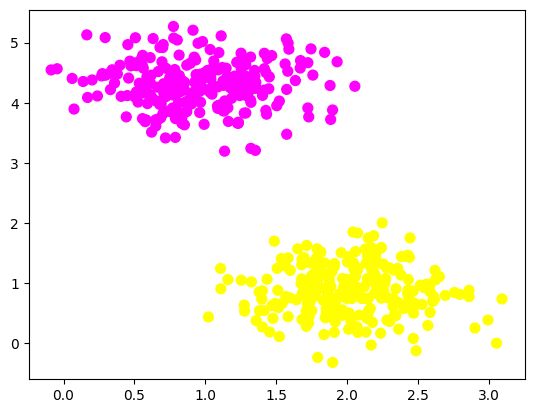

In [2]:

from sklearn.datasets import make_blobs


X, Y = make_blobs(n_samples=500, centers=2,
				random_state=0, cluster_std=0.40)
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring');
plt.show() 


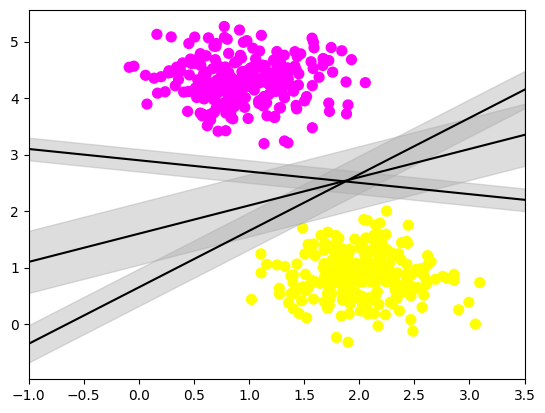

In [3]:

xfit = np.linspace(-1, 3.5)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')


for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
	yfit = m * xfit + b
	plt.plot(xfit, yfit, '-k')
	plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', 
	color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);
plt.show()


Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



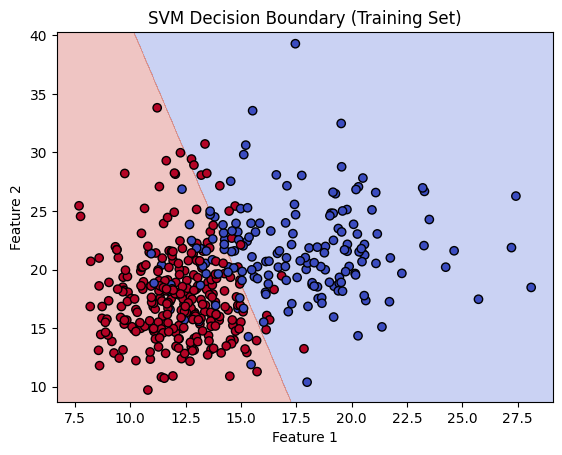

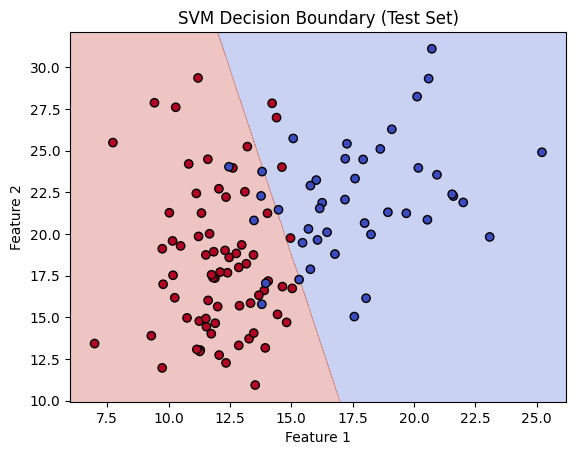

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data[:, :2]
y = data.target
labels = np.where(y == 0, 'M', 'B')
numeric_labels = np.where(labels == 'M', 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, numeric_labels, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()
plot_decision_boundary(X_train, y_train, svm_model, 'SVM Decision Boundary (Training Set)')
plot_decision_boundary(X_test, y_test, svm_model, 'SVM Decision Boundary (Test Set)')